In [1]:
from typing import Any, Union
import pandas as pd
import re   
import matplotlib
import matplotlib.pyplot as plt


#Read data from csv

df = pd.read_csv('input/GSAF5.csv', engine = 'python')

In [2]:
#Change display options
#pd.set_option('display.max_rows', 6000)
#pd.set_option('display.max_columns', 500)



In [3]:
#Remove two columns with no data

df = df.drop(columns = ['Unnamed: 22', 'Unnamed: 23'])

In [4]:
#Checking values in 'Case Number', 'Case Number.1' and 'Case Number.2'

cNcN1 = (df['Case Number'].eq(df['Case Number.1'])) # Differences between 'Case Number' and 'Case Number.1'

cNcN1.value_counts() # 13 different values

cNcN2 = (df['Case Number'].eq(df['Case Number.2'])) # Differences between 'Case Number' and 'Case Number.2'

cNcN2.value_counts() # 2 different values

True     5990
False       2
dtype: int64

In [5]:
# Remove both columns from previous case

df = df.drop(columns = ['Case Number.1', 'Case Number.2'])



In [6]:
#Standarize date values to 'Month' and 'Year'
months = df['Date']
monthList = []
for month in months: 
    correctMonth = re.search(r'[A-Z]{1}[a-z]{2}\b', month)
    if correctMonth:
        monthList.append(correctMonth.group())
    else:
        monthList.append('')
monthSeries = pd.Series(monthList)
df['Date'] = monthSeries


In [7]:
#Delete rows where 'Date' is not equal to a month, this removes about 540 registers from the original 5992, 
#which makes it less than the 10%.

dfMonths = df[(df['Date'] == 'Jan') | (df['Date'] == 'Feb') | (df['Date'] == 'Mar') | (df['Date'] == 'Apr') | (df['Date'] == 'May') | (df['Date'] == 'Jun') | (df['Date'] == 'Jul') | (df['Date'] == 'Aug') | (df['Date'] == 'Sep') | (df['Date'] == 'Oct') | (df['Date'] == 'Nov') | (df['Date'] == 'Dec')]


In [8]:
# Create a dictionary relating each country to the hemisphere it belongs
hemisphere = {
    'North': ['USA', 'BAHAMAS', 'MEXICO', 'ITALY', 'PHILIPPINES', 'SPAIN', 'EGYPT', 'CUBA', 'CROATIA', 'JAPAN', 'INDIA', 'PANAMA', 'JAMAICA', 'ENGLAND', 'GREECE', 'BERMUDA', 'IRAN', 'TURKEY', 'COSTA RICA', 'MARSHAL ISLANDS', 'VIETNAM', 'SENEGAL', 'UNITED KINGDOM', 'CANADA', 'TAIWAN', 'SCOTLAND', 'SIERRA LEONE', 'VENEZUELA', 'COLUMBIA', 'KENYA', 'FRANCE', 'ISRAEL', 'NORTH PACIFIC OCEAN', 'SOUTH COREA', 'DOMINICAN REPUBLIC', 'THAILAND', 'SOMALIA', 'CHINA', 'CARIBBEAN SEA', 'NEW BRITAIN', 'YEMEN', 'TURKS & CAICOS', 'SRI LANKA', 'MID ATLANTIC OCEAN', 'OKINAWA', 'MALTA', 'AZORES', 'BARBADOS', 'EL SALVADOR', 'RUSSIA', 'NICARAGUA' 'NORTH ATLANTIC OCEAN', 'MALAYSIA', 'GRENADA', 'SUDAN', 'PERSIAN GULF', 'PORTUGAL', 'SINGAPORE', 'CAPE VERDE', 'PALAU', 'HONDURAS', 'UNITED ARAB EMIRATES', 'SAUDI ARABIA', 'CENTRAL PACIFIC', 'HAITI', 'TRINIDAD & TOBAGO', 'IRAQ', 'CAYMAN ISLANDS', 'NORWAY', 'JOHNSTON ISLAND', 'LIBYA', 'YEMEN', 'BELIZE', 'TUNISIA', 'MONTENEGRO', 'BURMA', 'LIBERIA', 'NORTH SEA', 'PUERTO RICO', 'BRITISH WEST INDIES', 'EQUATORIAL GUINEA', 'NORTHEN MARIANA ISLANDS', 'PALESTINIAN TERRITORIES', 'NEVIS', 'KOREA', 'CYPRUS', 'ARUBA', 'ANDAMAN', 'SAN DOMINGO', 'BRITISH VIRGIN ISLANDS', 'NETHERLANDS ANTILLES', 'ITALY', 'JAVA', 'BAY OF BENGAL', 'GEORGIA', 'GUATEMALA', 'GULF OF ADEN', 'ST. MARTEEN', 'MALDIVE ISLANDS', 'MEDITERRANEAN SEA', 'BRITISH ISLES', 'ADMIRALTY ISLANDS', 'NORTHEN ARABIAN SEA', 'IRELAND', 'KUWAIT', 'MEXICO', 'LEBANON', 'THE BALKANS', 'GHANA', 'RED SEA', 'GUYANA', 'BANGLADESH', 'ANTIGUA', 'BETWEEN PORTUGAL AND INDIA', 'GUINEA', 'SOUTH CHINA SEA', 'ST. MARTIN'],
    'South': ['AUSTRALIA', 'SOUTH AFRICA', 'NEW ZEALAND', 'BRAZIL', 'PAPUA NEW GUINEA', 'REUNION', 'FIJI', 'NEW CALEDONIA', 'MOZAMBIQUE', 'SOLOMON ISLANDS', 'HONG KONG', 'FRENCH POLYNESIA', 'INDONESIA', 'TONGA', 'SOUTH ATLANTIC OCEAN', 'VANUATU', 'CHILE', 'ECUADOR', 'INDIAN OCEAN ', 'TANZANIA', 'MAURITIUS', 'SAMOA', 'SEYCHELLES', 'KIRIBATI', 'GUAM', 'MADAGASCAR', 'MICRONESIA', 'AMERICAN SAMOA', 'NEW GUINEA', 'NAMIBIA', 'SOUTH PACIFIC OCEAN', 'FALKLAND ISLANDS', 'PARAGUAY', 'ARGENTINA', 'SOLOMON ISLANDS', 'PARAGUAY', 'ST HELENA', 'WESTERN SAMONA', 'GABON', 'DIEGO GARCIA', 'BRITISH NEW GUINEA', 'COOK ISLANDS', 'FEDERATED STATES OF', 'MAYOTTE', 'SOUTHWEST PACIFIC OCEAN', 'TASMAN SEA']
}

In [9]:
#Extract the values of the countries to match them later with the hemisphere
countries = dfMonths['Country'].fillna('NO COUNTRY DATA')
okCountries = []
for country in countries:
    countryRe = re.search(r'[A-Za-z]+\.?\s*\&*\s*[A-Za-z]*\s*\&*\s*[A-Za-z]*', country)
    if countryRe:
        okCountries.append(countryRe.group().upper())
    else:
        okCountries.append('')
dfCountries = pd.Series(okCountries)
dfMonths['Country'] = dfCountries

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
#Create new Series to store the hemisphere values
hemisphereList = []
for coun in okCountries:
    if coun in hemisphere['North']:
        hemisphereList.append('North')
    elif coun in hemisphere['South']:
        hemisphereList.append('South')
    else:
        hemisphereList.append('Both hemispheres')

serieHemisphere = pd.Series(hemisphereList)


In [11]:
#Asigning the numerical value of the month to be sorted later in order
dfMonths['Hemisphere'] = serieHemisphere

dfMonthHemisphere = dfMonths[['Country', 'Date', 'Hemisphere']]

monthOrder = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3, 
    'Apr': 4, 
    'May': 5,
    'Jun': 6, 
    'Jul': 7, 
    'Aug': 8,
    'Sep': 9, 
    'Oct': 10, 
    'Nov': 11, 
    'Dec': 12
}
monthOrderList = []
for mon in dfMonthHemisphere['Date']:
    monthOrderList.append(int(monthOrder[mon]))

dfMonthHemisphere['MonthOrder'] = pd.Series(monthOrderList)



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
#Importing the dataframe as CSV.

dfMonthHemisphere.to_csv('././output/CleanedCSV.csv')

Text(0, 0.5, 'Nº Ataques')

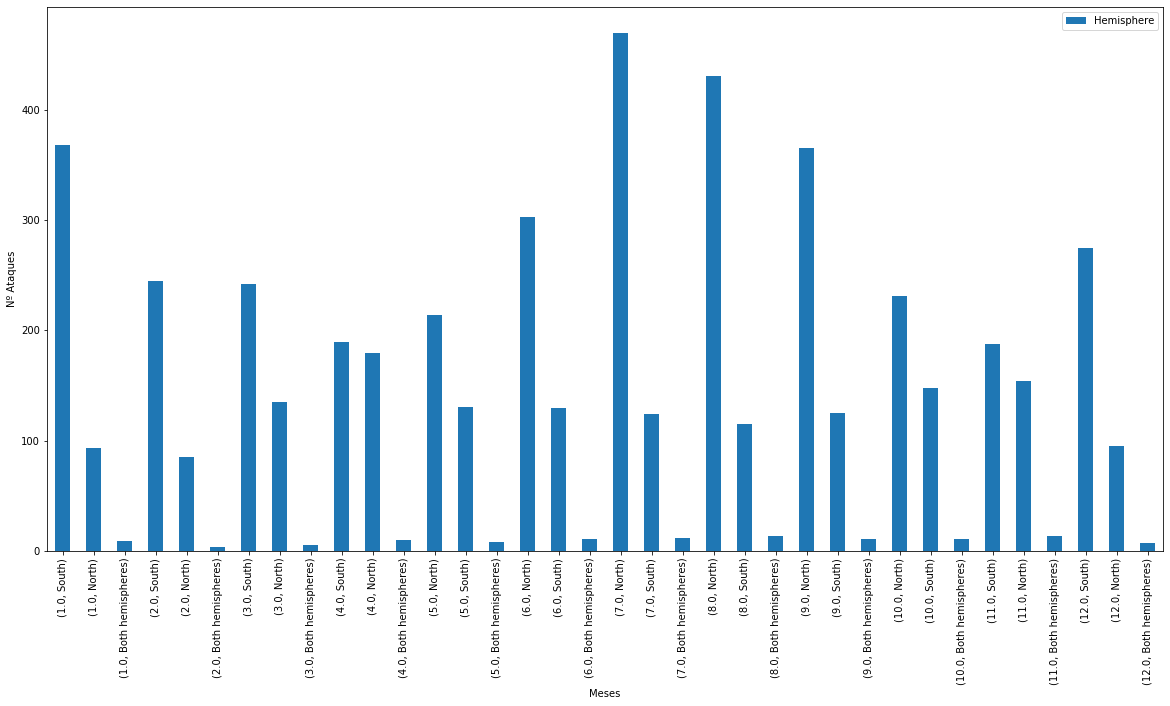

In [13]:
#Ploting the values for attacks depending on the month and the hemisphere

plotDf = dfMonthHemisphere.groupby(['MonthOrder']).agg({'Hemisphere': 'value_counts'})

barList = plotDf.plot.bar(figsize=(20,10))
plt.xlabel('Meses')
plt.ylabel('Nº Ataques')


In [14]:
#I'm going to clean the Fatal (Y/N) column. Replace all NaN values with Unknown and homogenize the Y/N

df['Fatal (Y/N)'].fillna('Unknown')
attacks = df['Fatal (Y/N)'].astype('str')
newFatal = []
for attack in attacks:
    okYN = re.search(r'[YN]{1}', attack)
    if okYN:
        newFatal.append(okYN.group())
    else:
        newFatal.append('Unknown')
newFatalDf = pd.Series(newFatal)

    


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12935cc90>],
      dtype=object)

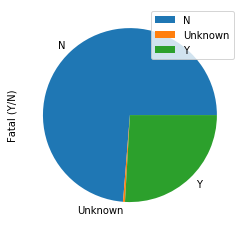

In [15]:
#Plotting the Non Deathly attacks / Deathly attacks/ Unknown attacks
df['Fatal (Y/N)'] = newFatalDf
df.groupby('Fatal (Y/N)').agg({'Fatal (Y/N)':'count'}).plot.pie(subplots=True)


In [16]:
#Renaming the Sex Series in order to remove the whitespace and casting it as str type
df['Sex'] = df['Sex '].astype('str')
#df['Sex'].value_counts()
df = pd.DataFrame.drop(df, columns = ['Sex '])



In [17]:
#Finding all cases where there was no data
newSex = []
for sex in df['Sex']:
    sexOk = re.search(r'[MF]{1}', sex)
    if sexOk:
        newSex.append(sexOk.group())
    else:
        newSex.append('No data')
df['Sex'] = pd.Series(newSex)
df['Sex'].value_counts()



M          4837
F           585
No data     570
Name: Sex, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x129389c90>],
      dtype=object)

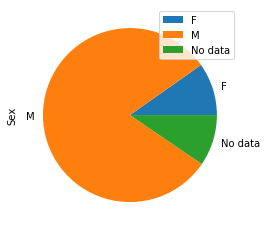

In [18]:
df.groupby(['Sex']).agg({'Sex': 'count'}).plot.pie(subplots=True)


